In [40]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import json

In [41]:
with open('HeatSense_ecg_data.json', 'r') as openfile:
    data = json.load(openfile)
    
ecg = data['stores'][0]['values']


In [45]:
ecglist = []

for l in ecg:
    if 'ecg' in l.keys():
        ecglist.append(l)


    


def flatten(xss):
    return [x for xs in xss for x in xs]



TIME_FORMAT = '%d-%m %H:%M:%S'
timestmps, ecgs = [], []
for d in ecglist:
        ecgs.append(d['ecg'])
        timestmps.append([datetime.utcfromtimestamp(
            d['timestamp']/1000).strftime(TIME_FORMAT)] * 125)
        
ecgs = flatten(ecgs)
timestmps = flatten(timestmps)
t = [x for x in range(len(ecgs))]




In [46]:
len(ecgs)

123168

In [44]:



""" def generate_sample_ecg_data():
    with open('data_2hr.json', 'r') as openfile:
        data = json.load(openfile)

    TIME_FORMAT = '%d-%m %H:%M:%S'
    timestmps, ecgs = [], []
    for d in data:
        ecgs.append(d['data'])
        timestmps.append([datetime.utcfromtimestamp(
            d['timestamp']).strftime(TIME_FORMAT)] * 125)

    ecgs = flatten(ecgs)
    timestmps = flatten(timestmps)
    t = [x for x in range(len(ecgs))] 
    return t, ecgs, timestmps """

" def generate_sample_ecg_data():\n    with open('data_2hr.json', 'r') as openfile:\n        data = json.load(openfile)\n\n    TIME_FORMAT = '%d-%m %H:%M:%S'\n    timestmps, ecgs = [], []\n    for d in data:\n        ecgs.append(d['data'])\n        timestmps.append([datetime.utcfromtimestamp(\n            d['timestamp']).strftime(TIME_FORMAT)] * 125)\n\n    ecgs = flatten(ecgs)\n    timestmps = flatten(timestmps)\n    t = [x for x in range(len(ecgs))] \n    return t, ecgs, timestmps "

In [6]:
""" t, ecgs, timestmps = generate_sample_ecg_data() """

## Simple 10s plot

In [47]:
sampling_rate = 125
window = 10

random_ts = np.random.choice(t[:-(sampling_rate*window)])

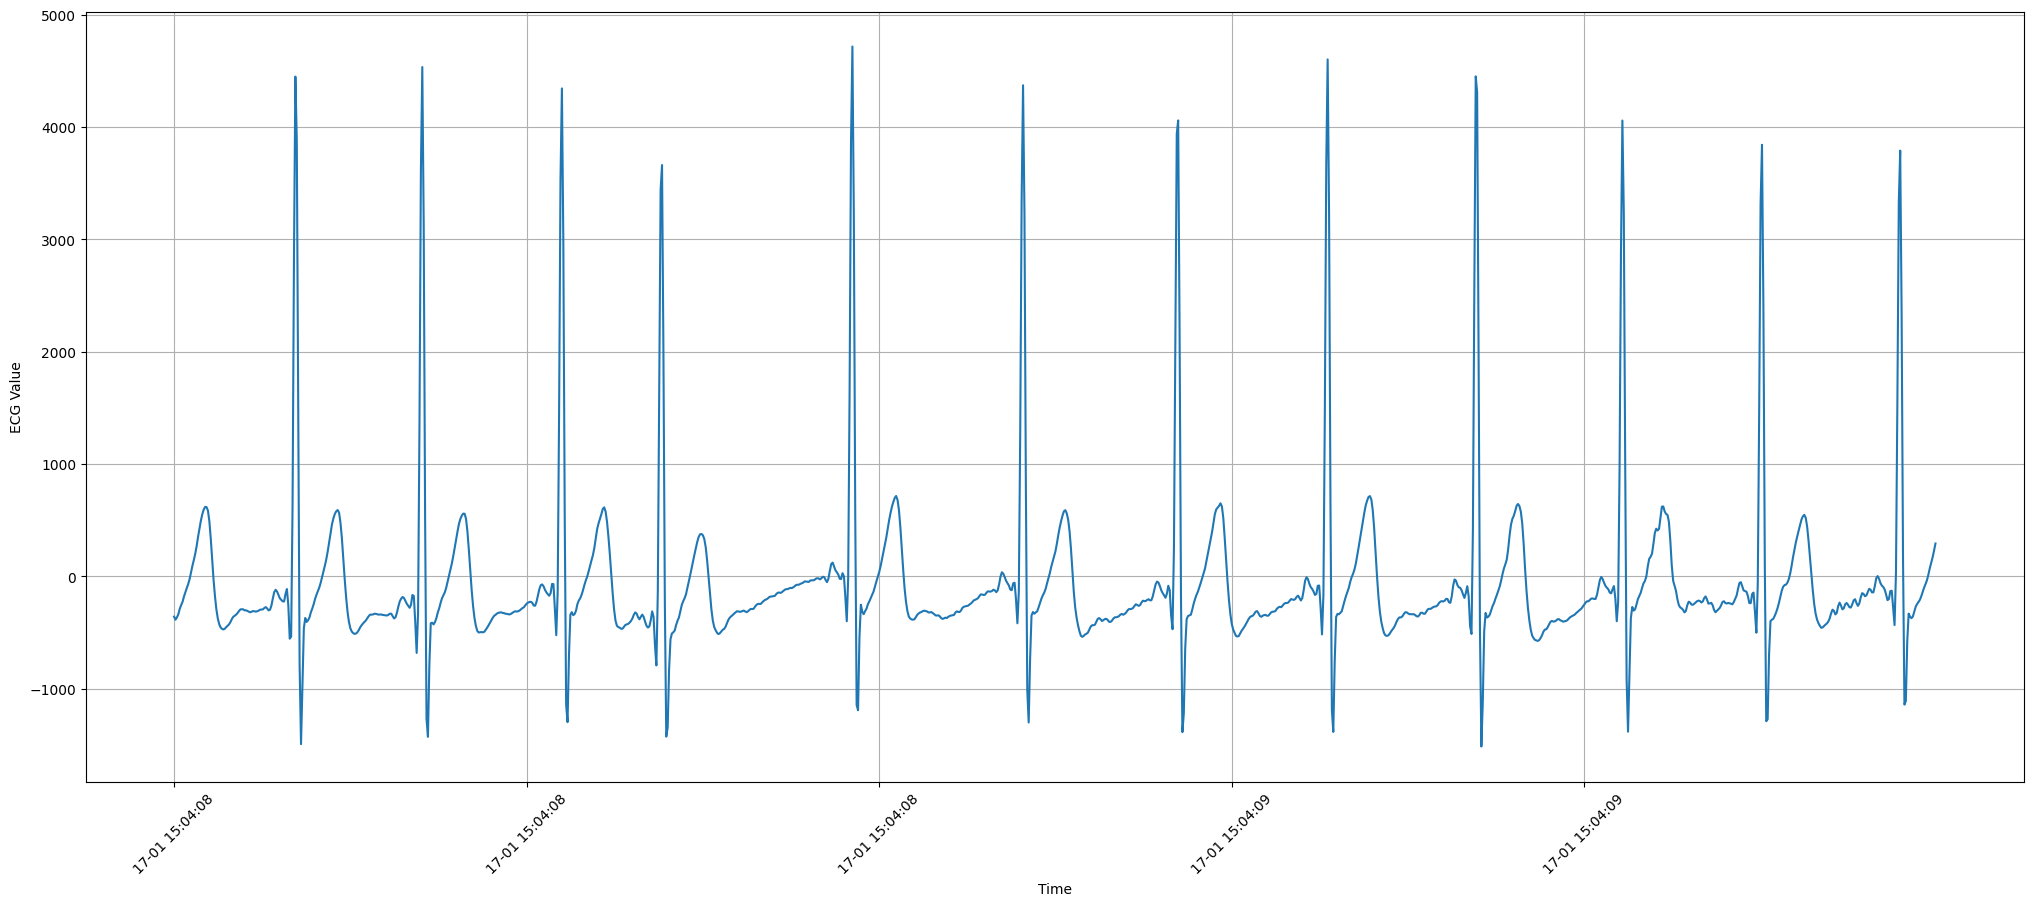

In [48]:
window_ts = timestmps[random_ts : random_ts+(sampling_rate*window)]

plt.figure(figsize=(25, 10))
plt.plot(t[random_ts : random_ts+(sampling_rate*window)], ecgs[random_ts : random_ts+(sampling_rate*window)])
plt.xlabel("Time")
plt.xticks(t[random_ts : random_ts+(sampling_rate*window)][::250], window_ts[::250], rotation=45)
plt.ylabel("ECG Value")
plt.grid(True)
plt.show()

## Interactive Plot

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np


# Function to plot 10-second segment
def plot_segment(start_index):
    end_index = start_index + 10 * sampling_rate  # Assuming 1 value per second
    segment_ecg = ecgs[start_index:end_index]
    segment_t = t[start_index:end_index]
    segment_timestamp = timestmps[start_index:end_index]

    plt.figure(figsize=(10, 4))
    plt.plot(segment_t, segment_ecg)
    plt.title(f"10-second ECG segment starting at time : {segment_timestamp[0]}")
    plt.xlabel("Time")
    plt.xticks([])
    plt.ylabel("ECG Value")
    plt.show()
# Create an interactive slider for timestamp selection
sampling_rate = 125  # replace with your actual sampling rate
max_index = len(ecgs) - 10 * sampling_rate
interact(plot_segment, start_index=(0, max_index, sampling_rate))


interactive(children=(IntSlider(value=449375, description='start_index', max=898750, step=125), Output()), _do…

<function __main__.plot_segment(start_index)>